<a href="https://colab.research.google.com/github/Parag0506/Toxic-speech/blob/master/Toxic_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {'username':'User-name','key':'Your KEY'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c jigsaw-multilingual-toxic-comment-classification

 89% 33.0M/37.3M [00:00<00:00, 49.8MB/s]
100% 37.3M/37.3M [00:00<00:00, 69.2MB/s]
  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 85.9MB/s]
 73% 9.00M/12.4M [00:00<00:00, 92.0MB/s]
100% 12.4M/12.4M [00:00<00:00, 79.3MB/s]
  0% 0.00/1.35M [00:00<?, ?B/s]
100% 1.35M/1.35M [00:00<00:00, 89.4MB/s]
 95% 278M/292M [00:02<00:00, 72.1MB/s]
100% 292M/292M [00:02<00:00, 122MB/s] 
 80% 24.0M/29.8M [00:00<00:00, 126MB/s]
100% 29.8M/29.8M [00:00<00:00, 118MB/s]
 87% 69.0M/79.6M [00:00<00:00, 168MB/s]
100% 79.6M/79.6M [00:00<00:00, 166MB/s]
 99% 641M/650M [00:04<00:00, 161MB/s]
100% 650M/650M [00:04<00:00, 142MB/s]
  0% 0.00/3.44M [00:00<?, ?B/s]
100% 3.44M/3.44M [00:00<00:00, 113MB/s]


In [0]:
!kaggle competitions download -c jigsaw-multilingual-toxic-comment-classification -p /content

  0% 0.00/1.35M [00:00<?, ?B/s]
100% 1.35M/1.35M [00:00<00:00, 33.7MB/s]
 98% 635M/650M [00:04<00:00, 180MB/s]
100% 650M/650M [00:04<00:00, 152MB/s]
 84% 25.0M/29.8M [00:00<00:00, 91.5MB/s]
100% 29.8M/29.8M [00:00<00:00, 98.3MB/s]
  0% 0.00/612k [00:00<?, ?B/s]
100% 612k/612k [00:00<00:00, 86.7MB/s]
  0% 0.00/3.44M [00:00<?, ?B/s]
100% 3.44M/3.44M [00:00<00:00, 114MB/s]
 97% 36.0M/37.3M [00:00<00:00, 167MB/s]
100% 37.3M/37.3M [00:00<00:00, 182MB/s]
 99% 289M/292M [00:01<00:00, 147MB/s]
100% 292M/292M [00:01<00:00, 158MB/s]
100% 79.6M/79.6M [00:00<00:00, 95.4MB/s]

  0% 0.00/12.4M [00:00<?, ?B/s]
100% 12.4M/12.4M [00:00<00:00, 114MB/s]


In [0]:
!unzip \*.zip

Archive:  jigsaw-toxic-comment-train.csv.zip
  inflating: jigsaw-toxic-comment-train.csv  

Archive:  validation.csv.zip
  inflating: validation.csv          

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  validation-processed-seqlen128.csv.zip
  inflating: validation-processed-seqlen128.csv  

Archive:  jigsaw-unintended-bias-train-processed-seqlen128.csv.zip
  inflating: jigsaw-unintended-bias-train-processed-seqlen128.csv  

Archive:  jigsaw-unintended-bias-train.csv.zip
  inflating: jigsaw-unintended-bias-train.csv  

Archive:  jigsaw-toxic-comment-train-processed-seqlen128.csv.zip
  inflating: jigsaw-toxic-comment-train-processed-seqlen128.csv  

Archive:  test-processed-seqlen128.csv.zip
  inflating: test-processed-seqlen128.csv  

8 archives were successfully processed.


In [0]:
import os
os.mkdir("input")

!mv "jigsaw-toxic-comment-train.csv" "input"
!mv "jigsaw-unintended-bias-train.csv" "input"
!mv "sample_submission.csv" "input"
!mv "test.csv" "input"
!mv "validation.csv" "input"
!mv "jigsaw-toxic-comment-train-processed-seqlen128.csv" "input"
!mv "jigsaw-unintended-bias-train-processed-seqlen128.csv" "input"
!mv "validation-processed-seqlen128.csv" "input"
!mv "test-processed-seqlen128.csv" "input"

In [0]:
!mkdir output

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.15.219.34:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.15.219.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.15.219.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [0]:
train = pd.read_csv('./input/jigsaw-toxic-comment-train.csv')
validation = pd.read_csv('./input/validation.csv')
test = pd.read_csv('./input/test.csv')

In [0]:
train.drop(['severe_toxic','obscene','threat','insult','identity_hate'],axis=1,inplace=True)

In [0]:
train.shape

(223549, 3)

In [0]:
train['comment_text'].apply(lambda x:len(str(x).split())).max()

2321

In [0]:
train.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [0]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
  
    return roc_auc

In [0]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train.comment_text.values, train.toxic.values, 
                                                  stratify=train.toxic.values, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [0]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 1500

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

NameError: ignored

In [0]:
%%time
with strategy.scope():
    # A simpleRNN without any pretrained embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     input_length=max_len))
    model.add(SimpleRNN(100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1500, 300)         90077400  
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 100)               40100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 90,117,601
Trainable params: 90,117,601
Non-trainable params: 0
_________________________________________________________________
CPU times: user 410 ms, sys: 161 ms, total: 571 ms
Wall time: 5.56 s


In [0]:
model.fit(xtrain_pad, ytrain, nb_epoch=5, batch_size=2048*strategy.num_replicas_in_sync) #Multiplying by Strategy to run on TPU's

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/5
178839/178839 [==============================] - 565s 3ms/step - loss: 0.4042 - accuracy: 0.8657
Epoch 2/5
178839/178839 [==============================] - 567s 3ms/step - loss: 0.3102 - accuracy: 0.9043
Epoch 3/5
178839/178839 [==============================] - 564s 3ms/step - loss: 0.2868 - accuracy: 0.9047
Epoch 4/5
178839/178839 [==============================] - 571s 3ms/step - loss: 0.2623 - accuracy: 0.9012
Epoch 5/5
178839/178839 [==============================] - 568s 3ms/step - loss: 0.2462 - accuracy: 0.9090


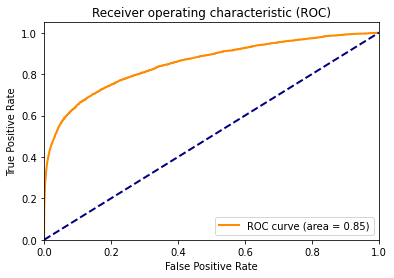

Auc: 0.85%


In [0]:
scores = model.predict(xvalid_pad)
#roc_auc(scores,yvalid)
print("Auc: %.2f%%" % (roc_auc(scores,yvalid)))

In [0]:
model.save('./output/simpleRCNN_model.h5')

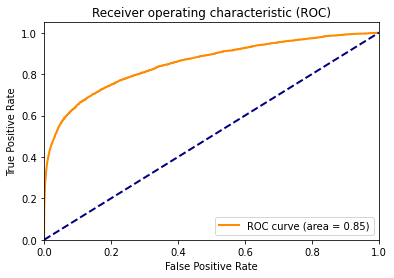

In [0]:
scores_model = []
scores_model.append({'Model': 'SimpleRNN','AUC_Score': roc_auc(scores,yvalid)})

In [0]:
#save model weights and json separately
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("SimpleRNN_weights.h5")
print("Saved model to disk")

In [0]:
#LSTM 

In [0]:
!cd input

In [0]:
!wget http://www-nlp.stanford.edu/data/glove.840B.300d.zip

--2020-06-07 14:10:47--  http://www-nlp.stanford.edu/data/glove.840B.300d.zip
Resolving www-nlp.stanford.edu (www-nlp.stanford.edu)... 171.64.67.140
Connecting to www-nlp.stanford.edu (www-nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-06-07 14:10:47--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-06-07 14:10:47--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP r

In [0]:
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [0]:
!mv "glove.840B.300d.txt" "input"

In [0]:
!cd ..

In [0]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('./input/glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196017it [03:47, 9645.68it/s] 

Found 2196016 word vectors.


In [0]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

NameError: ignored

In [0]:
%%time
with strategy.scope():
    
    # A simple LSTM with glove embeddings and one dense layer
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))

    model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    
model.summary()